# Lab 02
## Conrad Appel & Eric Hawkins

For this project, we used a data set called "[Comcast Customer Complaints](https://www.kaggle.com/archaeocharlie/comcastcomplaints)", which was uploaded to Kaggle by user Charlie H. The data set consists of CSVs, one containing customer complaints to Consumer Affairs about Comcast and another containing customer complaints to the FCC about Comcast, both during the course of 2015. Charlie H. scraped the data from consumeraffairs.com and cityexplainer after an overly lengthy support call in order to see if other customers had a similar experience.

Comcast is notorious for having bad customer service. By examining the complaints in this data set, we hoped to find what sorts of negative experiences have fueled this negative perception of the company's customer support.

In [1]:
import pandas as p
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import seaborn as s
import matplotlib.pyplot as plt
from wordcloud import WordCloud # conda install -c https://conda.anaconda.org/amueller wordcloud
%matplotlib inline

In [2]:
# Load data from csv and print the total number of documents.
data = p.read_csv('comcast-fcc-complaints-2015.csv')
print("Number of documents: " + str(len(data)))

Number of documents: 2225


In [3]:
# take out lines that are repeated in every complaint
def replace_bad_lines(doc):
    bad_lines = ['Follow-up message', '- - - - -', 'This constitutes a notice of informal complaint', 'For more information on your legal responsibilities', 'If you have any questions regarding this notice']
    splitted = doc.split('\n')
    for bad_l in bad_lines:
        splitted = [line for line in splitted if bad_l.lower() not in line.lower()]
    doc = ' '.join(splitted)
    return doc

data['Description'] = data['Description'].apply(replace_bad_lines)

In [4]:
# Create list of stop words from built-in stop words list along with words particular to the dataset.
stop_word_list = stopwords.words('english') + ['br', 'would', 'get', 'gurmilap', 'chris']

In [5]:
# Vectorize data
bow_vectorizer = CountVectorizer(stop_words=list(stop_word_list))
bow = bow_vectorizer.fit_transform(data['Description'])
bow_df = p.DataFrame(data=bow.toarray(), columns=bow_vectorizer.get_feature_names())
print("Vocabulary size: "+str(len(bow_vectorizer.vocabulary_)))

Vocabulary size: 12434


In [6]:
# Perform tf-idf vectorization
tfidf_transformer = TfidfVectorizer(stop_words=list(stop_word_list))
tfidf = tfidf_transformer.fit_transform(data['Description'])

tfidf_df = p.DataFrame(data=tfidf.toarray(), columns=tfidf_transformer.get_feature_names())

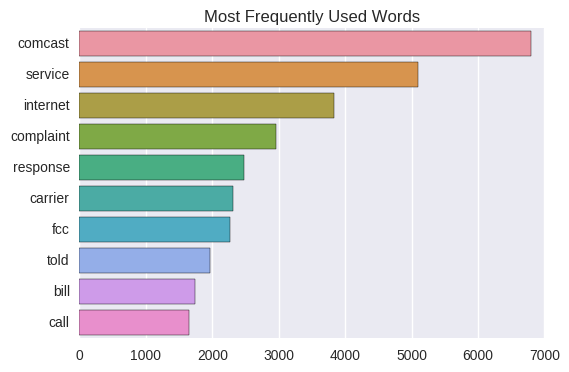

In [7]:
# Plot top 10 words used
top_used_words = bow_df.sum().sort_values(ascending=False)[:10]

top_ax = s.barplot(top_used_words.values, top_used_words.index, orient="h").set_title('Most Frequently Used Words')

The most common word is 'Comcast', which makes sense as this is a data-set focused on complaints about Comcast.

The second most common word accross the set is 'service'. From looking at the dataset, this appears to be from instances where customers are complaining about their experience with Comcast's "customer service" or "service".

The third most common term is 'internet', which seems to show that a large number of customers are having problems with their Comcast-provided internet service. Of the services provided by Comcast, this appears to be the one that most people have a problem with, seeing as how words that might refer to the other services provided by Comcast, such as 'phone', 'cable', or 'voice', occur significantly less frequently. In the case of Comcast's voice service, this seems to reflect the trend of consumers shifting from home phones to using exclusively cell phones. In the case of Comcast's cable service, one might conclude that they relatively exceptional cable service or that not nearly as many customers use it.

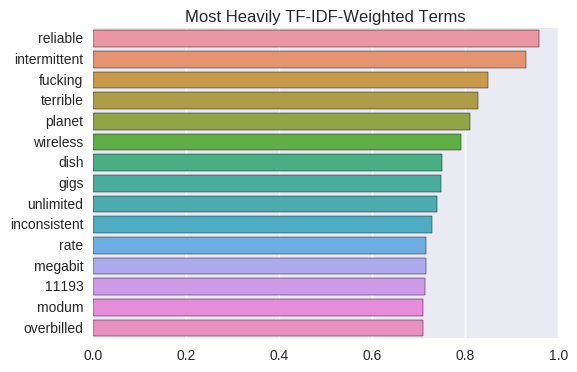

In [8]:
# Plot terms with the highest tf-idf weights
heaviest_words = tfidf_df.max().sort_values(ascending=False)[:15]

hv_ax = s.barplot(heaviest_words.values, heaviest_words.index, orient="h").set_title('Most Heavily TF-IDF-Weighted Terms')

Tf-idf weighting refers to a statistic representing the significance of a particular term in a document within a collection of documents. Terms with the highest tf-idf rankings occur many times within a small number of documents. These scores are somewhat lower if the term occurs fewer times in a document or occurs across a large number of documents. This score is at its lowest when the term occurs in nearly, if not all, documents. These values should not be used to determine what problems are the most widespread.

The word with the greatest tf-idf value is 'reliable'. Ironically, in the dataset, this word seems to be used most frequently to describe either what the complaining customer's internet service is *not* or what it used to be but isn't anymore.

The word with the second highest maximum score is 'intermittent', which, in the case of these complaints, should point out to Comcast that their on-and-off service is very bad, especially to certain individuals.

The third highest scoring term is 'fucking'. However, this doesn't mean that it occurs frequently across the dataset. Much of the reason why the term has such a high weighting is that it occurs *a lot* in a small number of documents. The document in which this high weight was achieved is printed below as an example of this weighting in action.

In [9]:
print(data['Description'][195])

See attached  The consumer needs to update their contact information.  Attached you will find the consumer's complaint.  Attached you will find a revised version of the consumer's complaint.  ALL OF THE RECORDS ARE ON COMCAST'S SIDE YOU FUCKING IDIOTS THEY BROKE THE LAW. YOU FUCKING BASTARDS. THANKS FOR NOTHING YOU FUCKING BASTARDS. THIS IS A FAKE FUCKING COUNTRY.  YOU FUCKING BASTARDS I WILL NEVER FORGET THE COMPLETE LACK OF ANY FUCKING SORT OF EFFORT YOU EVIL FUCKING BASTARDS. YOU HAVE CREATED AN AMPLE FUCKING AMOUNT OF WORK FOR ME AND YOU HAVE PROVEN YOU ARE A FUCKING EVIL DAMNED USELESS COMPLACENT FUCKING WASTE OF FUCKING MONEY YOU FUCKING USELESS COMMISSION YOU FUCKING BASTARDS FUCK YOU AND YOUR FUCKING WASTEFUL SPENDING STALLING YOU FUCKING BASTARDS!!  GOD DAMN YOU FUCKING GOD DAMN BASTARDS YOU FUCKING USELESS EVIL PANDERERS WASTE OF THEFT YOU FUCKING THIEVING BASTARDS GOD DAMN YOU YOU FUCKING BASTARDS!!  HOW FUCKING DARE YOU!!!!!!!!!!!!!!  YOU GOD DAMN FUCKING BASTARDS!!!!!!!!!!

Strangely, the thirteenth highest scoring term is '11193', which seems to be the ID of a customer support ticket that was never resolved. This term occurs only once across the entire dataset. However, the text of its entry is very short: `Ticket 11193 closed but no resolution was obtained. This ticket was closed on April 4, 2015`. The brevity is likely what caused the term to score so high, and, since the only time it occurs in the data set was the day the ticket it refers to was closed, we can guess that this ticket was probably opened and discussed before the dataset started being collected, especially since the first entry occurs three days prior on April 1, 2015.

Lastly, it's fairly amusing that the fourteenth heaviest-weight word is "modum". It seems that a user doesn't know how to spell and complained about their "modem" a lot.

For the most part, the remaining terms in the top ten are from complaints about Comcast's unlimited data plans, mentions of their competitor Dish, complaints about internet speed, and complaints about overbilling.

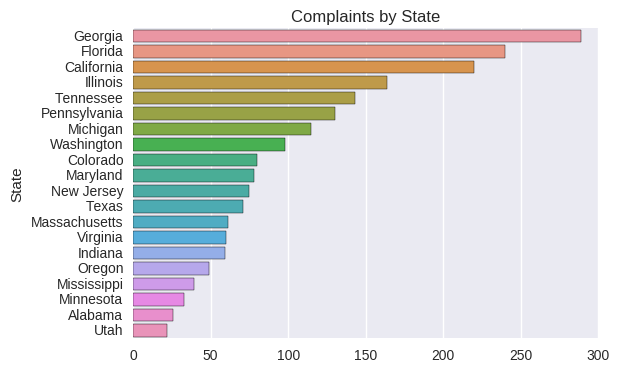

In [10]:
complaints_by_state = data.groupby('State')['Ticket #'].count().sort_values(ascending=False)[:20]
by_state_ax = s.barplot(complaints_by_state.values, complaints_by_state.index, orient="h").set_title('Complaints by State')

One way we can classify the data set is by states in which the complaints originate. As we don't take into account the size of the state or the state's population, we can expect the statistics to be skewed by those factors. One state that sticks out is Georgia. Surprisingly, even with a fourth of the population of California (10.21 million vs 39.14 million), Georgia has 69 more complaints in 2015. The same thing happened with Florida, which has half the population of California (20.27 million), but 20 more complaints in 2015. This pattern suggests that these specific states probably have significantly more issues with the infrastructure and Comcast should focus their efforts there.

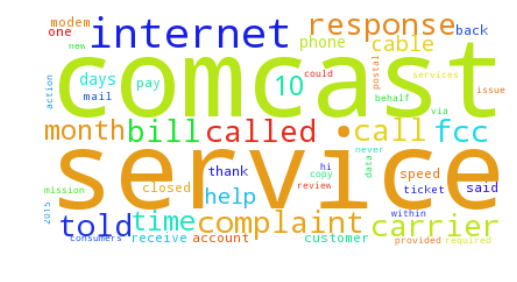

In [11]:
# Create word cloud of the most frequently used terms
wc = WordCloud(max_words=50, background_color="white").generate_from_frequencies(bow_df.sum().sort_values(ascending=False).iteritems())
plt.axis("off")
wc_ax = plt.imshow(wc)